
<h1> Predicting COVID-19 from Chest X-Ray Images


<h3> STEP 1: IMPORTING NECESSARY LIBRARIES 

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

<h3> STEP 2: CLONING AND SETTING UP THE DATASET 

In [70]:
main_dir = "Chext-X-ray-Images-Data-Set/DataSet/Data"

# Initiliasing Test and Train Directory
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#Setting up directory for Normal and Covid 19 Images
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")

In [71]:
# Getting all image files in the directory  : 
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

In [72]:
train_covid_names

['COVID-19 (1).jpeg',
 'COVID-19 (1).png',
 'COVID-19 (10).jpeg',
 'COVID-19 (101).jpg',
 'COVID-19 (107).jpg',
 'COVID-19 (11).jpeg',
 'COVID-19 (11).jpg',
 'COVID-19 (12).jpeg',
 'COVID-19 (12).jpg',
 'COVID-19 (13).jpeg',
 'COVID-19 (14).jpeg',
 'COVID-19 (15).jpeg',
 'COVID-19 (15).jpg',
 'COVID-19 (151).jpg',
 'COVID-19 (155).jpg',
 'COVID-19 (156).jpg',
 'COVID-19 (159).jpg',
 'COVID-19 (16).jpg',
 'COVID-19 (160).jpg',
 'COVID-19 (161).jpg',
 'COVID-19 (162).jpg',
 'COVID-19 (168).jpg',
 'COVID-19 (169).jpg',
 'COVID-19 (17).jpg',
 'COVID-19 (173).jpg',
 'COVID-19 (174).jpg',
 'COVID-19 (177).jpg',
 'COVID-19 (178).jpg',
 'COVID-19 (179).jpg',
 'COVID-19 (18).jpeg',
 'COVID-19 (180).jpg',
 'COVID-19 (186).jpg',
 'COVID-19 (187).jpg',
 'COVID-19 (19).jpeg',
 'COVID-19 (191).jpg',
 'COVID-19 (192).jpg',
 'COVID-19 (195).jpg',
 'COVID-19 (196).jpg',
 'COVID-19 (197).jpg',
 'COVID-19 (2).jpeg',
 'COVID-19 (2).png',
 'COVID-19 (20).jpeg',
 'COVID-19 (21).jpeg',
 'COVID-19 (23).jpeg',

<h3> STEP 3: DATA VISUALISATION 

In [73]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

['Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (1).jpeg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (1).png', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (10).jpeg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (101).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (107).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (11).jpeg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (11).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (12).jpeg']
['Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NORMAL(0).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NORMAL(1).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NORMAL(100).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NORMAL(1000).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NOR

<Figure size 864x864 with 0 Axes>

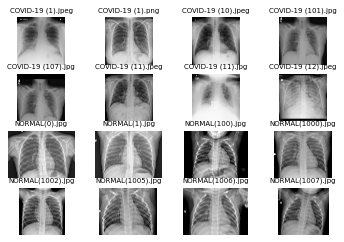

In [74]:
merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  sub = img_path.split("/", 6)[2]
  title = sub.split("\\",4)[3]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 7)
  plt.imshow(img, cmap= "gray")

plt.show()

<h3> 4) DATA PREPROCESSING AND AUGMENTATION


In [75]:
# Creating batches for Training, Validation and Testing

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,)
dgen_test = ImageDataGenerator(rescale = 1./255,)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150), 
                                               batch_size = 32, 
                                               class_mode = "binary")

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [76]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


<h3> 5) BUILDING CNN


In [77]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 37, 37, 64)       


<h3>STEP 6: COMPILING AND TRAINING THE NEURAL NETWORK MODEL


In [78]:
model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [79]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = 4, 
                    validation_data = validation_generator)

Epoch 1/4
46/46 [==============================] - 122s 3s/step - loss: 0.8664 - accuracy: 0.7957 - val_loss: 0.3633 - val_accuracy: 0.9309
Epoch 2/4
46/46 [==============================] - 99s 2s/step - loss: 0.2551 - accuracy: 0.9061 - val_loss: 0.2444 - val_accuracy: 0.9448
Epoch 3/4
46/46 [==============================] - 104s 2s/step - loss: 0.1989 - accuracy: 0.9372 - val_loss: 0.2018 - val_accuracy: 0.9448
Epoch 4/4
46/46 [==============================] - 95s 2s/step - loss: 0.1619 - accuracy: 0.9462 - val_loss: 0.1543 - val_accuracy: 0.9475



<h3> 7) PERFORMING EVALUATION


Text(0.5, 0, 'epoch')

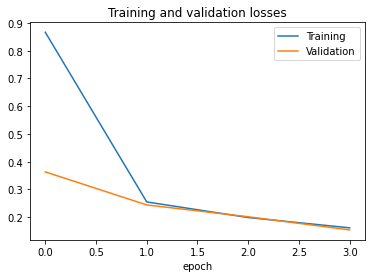

In [80]:


# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

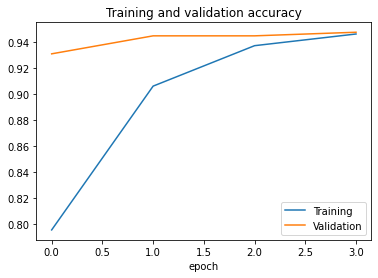

In [81]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [82]:
# GETTING TEST ACCURACY AND LOSS
test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 20s 1s/step - loss: 0.2018 - accuracy: 0.9215
Test Set Loss :  0.20184817910194397
Test Set Accuracy :  0.9214876294136047


In [83]:
model.save("model.h5")